Batch calculation of archaic introgression in papio and anubis

In [1]:
%run ../scripts/notebook_settings.py

In [2]:
meta_data_samples = pd.read_table("../data/metadata_with_x_missing.txt", sep=" ")
chromosome_numbers = ['{}'.format(x) for x in range(1, 21)] + ['X']

In [3]:
meta_data_samples[9:]

,PGDP_ID,Provider_ID,Provider,Genus,Species,Origin,Sex,address,longitude,latitude,callset_index,C_origin,x_missing
9,PD_0067,1043,Roos,Theropithecus,gelada,captive,M,"SDSU Captive Wildlife Research Facility, Brook...",-96.793280,44.334031,9,"Gelada, Captive",0.024995
10,PD_0199,09SNF1101115,Knauf/Chuma/Roos,Papio,anubis,"Serengeti, Tanzania",F,"Serengeti, Mara, Lake Zone, Tanzania",34.742544,-1.996626,10,"Anubis, Tanzania",0.003591
11,PD_0200,11SNF1101115,Knauf/Chuma/Roos,Papio,anubis,"Serengeti, Tanzania",F,"Serengeti, Mara, Lake Zone, Tanzania",34.742544,-1.996626,11,"Anubis, Tanzania",0.004100
12,PD_0201,19SNM1131115,Knauf/Chuma/Roos,Papio,anubis,"Serengeti, Tanzania",M,"Serengeti, Mara, Lake Zone, Tanzania",34.742544,-1.996626,12,"Anubis, Tanzania",0.010000
13,PD_0202,20SNF1131115,Knauf/Chuma/Roos,Papio,anubis,"Serengeti, Tanzania",M,"Serengeti, Mara, Lake Zone, Tanzania",34.742544,-1.996626,13,"Anubis, Tanzania",0.010041
...,...,...,...,...,...,...,...,...,...,...,...,...,...
222,PD_0790,34418_BZ11065,Rogers/Jolly/Phillips-Conroy,Papio,kindae,"Chunga, Zambia",F,"Chunga, Mumbwa District, Central Province, Zambia",26.005210,-15.053557,222,"Kindae, Zambia",0.009835
223,PD_0791,34419_BZ11066,Rogers/Jolly/Phillips-Conroy,Papio,kindae,"Chunga, Zambia",F,"Chunga, Mumbwa District, Central Province, Zambia",26.005210,-15.053557,223,"Kindae, Zambia",0.009672
224,PD_0792,34420_BZ11067,Rogers/Jolly/Phillips-Conroy,Papio,kindae,"Chunga, Zambia",F,"Chunga, Mumbwa District, Central Province, Zambia",26.005210,-15.053557,224,"Kindae, Zambia",0.010119
225,PD_0793,34422_BZ11070,Rogers/Jolly/Phillips-Conroy,Papio,kindae,"Chunga, Zambia",M,"Chunga, Mumbwa District, Central Province, Zambia",26.005210,-15.053557,225,"Kindae, Zambia",0.014323


In [4]:
sum(meta_data_samples.Origin != "captive")

225

In [5]:
meta_data_samples.iloc[9:,:].Provider.unique()

array(['Roos', 'Knauf/Chuma/Roos', 'Zinner/Fischer',
       'Rogers/Jolly/Phillips-Conroy', 'Jolly/Phillips-Conroy', 'Rogers '],
      dtype=object)

Archaic blocks in papio

In [6]:
ingroup_ids = meta_data_samples.loc[meta_data_samples.Species == "papio"].callset_index.values
ingroup_names = meta_data_samples.loc[meta_data_samples.Species == "papio"].PGDP_ID.values
outgroup_ids = meta_data_samples.loc[(meta_data_samples.Species != "papio") &
                                     (meta_data_samples.Species != "gelada")].callset_index.values
dir_name = "papio_intro/"

In [7]:
path = "../"+dir_name+"chr{}/{}_chr{}_decoded.Summary.txt"
archaic_lengths = 0
normal_lengths = 0
id_list = []
percentage_list = []
chrom_list = []
for chrom in chromosome_numbers:
    for ID in ingroup_names:
        summary_file = pd.read_csv(path.format(chrom, ID, chrom), sep = "\t")
        archaic_lengths += summary_file.loc[summary_file.state == "Archaic"].length.sum()
        normal_lengths += summary_file.loc[summary_file.state == "Baboon"].length.sum()
        id_list.append(ID)
        percentage_list.append(summary_file.loc[summary_file.state == "Archaic"].length.sum()/summary_file.length.sum())
        chrom_list.append(chrom)
    print(chrom)

1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
X


In [8]:
archaic_lengths/(normal_lengths+archaic_lengths)

0.08189774418988072

In [9]:
d = {"PGDP_ID": id_list, "Archaic_percentage": percentage_list, "chrom": chrom_list}
df_papio = pd.DataFrame(data=d)

<AxesSubplot:xlabel='Archaic_percentage', ylabel='Count'>

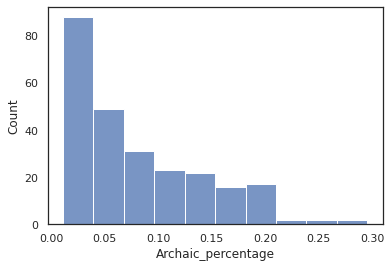

In [10]:
sns.histplot(df_papio, x="Archaic_percentage")

In [11]:
df_papio.groupby("PGDP_ID").mean()

,Archaic_percentage
PGDP_ID,
PD_0390,0.089719
PD_0391,0.079784
PD_0392,0.082030
PD_0393,0.079981
PD_0394,0.079612
PD_0395,0.083312
PD_0396,0.075040
PD_0397,0.088822
PD_0398,0.082612


In [12]:
df_papio.groupby("chrom").mean()

,Archaic_percentage
chrom,
1,0.176071
10,0.061771
11,0.096906
12,0.092785
13,0.125131
14,0.105319
15,0.183323
16,0.044846
17,0.015390


In [13]:
df_papio.loc[df_papio.chrom=="X"]

,PGDP_ID,Archaic_percentage,chrom
240,PD_0390,0.295403,X
241,PD_0391,0.254997,X
242,PD_0392,0.222044,X
243,PD_0393,0.182877,X
244,PD_0394,0.183768,X
245,PD_0395,0.025777,X
246,PD_0396,0.023822,X
247,PD_0397,0.029090,X
248,PD_0398,0.026926,X
249,PD_0399,0.029584,X


Block stats

In [ ]:
path = "../"+dir_name+"chr{}/{}_chr{}_decoded.All_posterior_probs.txt"
df_start = None
total_df = pd.DataFrame()
df_list = []
for chrom in chromosome_numbers:
    for ID in ingroup_names:
        total_file = pd.read_csv(path.format(chrom, ID, chrom), sep = "\t")
        if df_start == None:
            total_df = total_file
            df_start = True
        total_df[ID] = total_file["Mostlikely"]
    df_list.append(total_df)
    df_start = None
    print(chrom)
all_chromosomes = pd.concat(df_list)

1
2
3
4
5
6
7
8
9


In [ ]:
sns.histplot((total_df.iloc[:,7:] == "Archaic").sum(axis=1))

In [ ]:
chrom_blocks = (all_chromosomes.iloc[:,7:] == "Archaic").sum(axis=1)

In [ ]:
sns.histplot(chrom_blocks.loc[(chrom_blocks > 1)]).set_title("Number of archaic blocks per window, removing 0")

In [ ]:
sns.histplot((all_chromosomes.iloc[:,7:] == "Archaic").sum(axis=1)).set_title("Number of archaic blocks per window")

Archaic blocks in anubis

In [ ]:
ingroup_ids = meta_data_samples.loc[meta_data_samples.Species == "anubis"].callset_index.values
ingroup_names = meta_data_samples.loc[meta_data_samples.Species == "anubis"].PGDP_ID.values
outgroup_ids = meta_data_samples.loc[(meta_data_samples.Species != "anubis") &
                                     (meta_data_samples.Species != "gelada")].callset_index.values
dir_name = "anubis_intro/"

In [ ]:
path = "../"+dir_name+"chr{}/{}_chr{}_decoded.Summary.txt"
archaic_lengths = 0
normal_lengths = 0
id_list = []
percentage_list = []
chrom_list = []
for chrom in chromosome_numbers:
    for ID in ingroup_names:
        summary_file = pd.read_csv(path.format(chrom, ID, chrom), sep = "\t")
        archaic_lengths += summary_file.loc[summary_file.state == "Archaic"].length.sum()
        normal_lengths += summary_file.loc[summary_file.state == "Baboon"].length.sum()
        id_list.append(ID)
        percentage_list.append(summary_file.loc[summary_file.state == "Archaic"].length.sum()/summary_file.length.sum())
        chrom_list.append(chrom)
    print(chrom)

In [ ]:
archaic_lengths/(normal_lengths+archaic_lengths)

Block stats, anubis

In [ ]:
path = "../"+dir_name+"chr{}/{}_chr{}_decoded.All_posterior_probs.txt"
df_start = None
total_df = pd.DataFrame()
df_list = []
for chrom in chromosome_numbers:
    for ID in ingroup_names:
        total_file = pd.read_csv(path.format(chrom, ID, chrom), sep = "\t")
        if df_start == None:
            total_df = total_file
            df_start = True
        total_df[ID] = total_file["Mostlikely"]
    df_list.append(total_df)
    df_start = None
    print(chrom)
all_chromosomes = pd.concat(df_list)

In [ ]:
sns.histplot((total_df.iloc[:,7:] == "Archaic").sum(axis=1))

Hmm model investigation

In [ ]:
ingroup_ids = meta_data_samples.loc[meta_data_samples.Species == "papio"].callset_index.values
ingroup_names = meta_data_samples.loc[meta_data_samples.Species == "papio"].PGDP_ID.values
outgroup_ids = meta_data_samples.loc[(meta_data_samples.Species != "papio") &
                                     (meta_data_samples.Species != "gelada")].callset_index.values
dir_name = "papio_intro/"

In [ ]:
path = "../"+dir_name+"chr{}/{}.chr{}_trained.hmm"
t1, t2, t3, t4, e1, e2 = [], [], [], [], [], []
for ID in ingroup_names:
    for chromosome in chromosome_numbers:
        with open(path.format(chromosome, ID, chromosome)) as f:
            lines = f.readlines()
        hmm_t = []
        for l in lines[7].strip()[14:].split(","):
            hmm_t.append(l.strip("]["))
        t1.append(hmm_t[0]), t2.append(hmm_t[1]), t3.append(hmm_t[2]), t4.append(hmm_t[3])
        hmm_e = (lines[10].strip()[12:].strip("[]").split(","))
        e1.append(hmm_e[0]), e2.append(hmm_e[1])
        
d = {"t1": t1, "t2": t2,"t3": t3,"t4": t4,"e1": e1,"e2": e2}
hmm_df = pd.DataFrame(data=d)
hmm_df = hmm_df.astype("float")

In [ ]:
sns.histplot(hmm_df.e2/hmm_df.e1)